In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [2]:
# Reading data into pandas dataframe

df = pd.read_csv('/data/Lana/credit_card_transactions-ibm_v2.csv')
#Removing strange characters from columns
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('\?', '')
# Removing special characters from dataset
df['Amount'] = df['Amount'].str.replace('\$', '')
df['UseChip'] = df['UseChip'].str.replace(' ', '')

# Converting MerchantName column to string
df['MerchantName'] = df['MerchantName'].apply(str)

# Replacing Yes/No by 1s and 0s
df['IsFraud'] = df.IsFraud.map(dict(Yes=1, No=0))

df.head()

<ipython-input-2-168d1edc500a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('\?', '')
<ipython-input-2-168d1edc500a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Amount'] = df['Amount'].str.replace('\$', '')


User  Card  Year  Month  Day   Time  Amount           UseChip  \
0     0     0  2002      9    1  06:21  134.09  SwipeTransaction   
1     0     0  2002      9    1  06:42   38.48  SwipeTransaction   
2     0     0  2002      9    2  06:22  120.34  SwipeTransaction   
3     0     0  2002      9    2  17:45  128.95  SwipeTransaction   
4     0     0  2002      9    3  06:23  104.71  SwipeTransaction   

          MerchantName   MerchantCity MerchantState      Zip   MCC Errors  \
0  3527213246127876953       La Verne            CA  91750.0  5300    NaN   
1  -727612092139916043  Monterey Park            CA  91754.0  5411    NaN   
2  -727612092139916043  Monterey Park            CA  91754.0  5411    NaN   
3  3414527459579106770  Monterey Park            CA  91754.0  5651    NaN   
4  5817218446178736267       La Verne            CA  91750.0  5912    NaN   

   IsFraud  
0        0  
1        0  
2        0  
3        0  
4        0

Describing the data

## Just Swipe data

In [3]:
dfSwipe=df.loc[df['UseChip'] == 'SwipeTransaction']
#dfSwipe.head()

## Undersampling data

In [4]:
#define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [14]:
y = dfSwipe.IsFraud
feature_cols = ['User','Card', 'Year', 'Month','Day', 'MerchantName','MerchantCity', 'MerchantState', 'MCC']
X = dfSwipe[feature_cols]

In [15]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

### Defining dummy variables

In [16]:
State_dummy=pd.get_dummies(X_under['MerchantState'],prefix="State")
MerchantName_dummy = pd.get_dummies(X_under['MerchantName'],prefix="Name")
MerchantCity_dummy = pd.get_dummies(X_under['MerchantCity'],prefix="City")
X_under_dummy= pd.concat([X_under, State_dummy, MerchantName_dummy, MerchantCity_dummy], axis =1)
# Dropping categorical columns
X_under_dummy=X_under_dummy.drop(['MerchantState','MerchantName','MerchantCity'], axis=1)

X_under_dummy.head()

User  Card  Year  Month  Day   MCC  State_AA  State_AK  State_AL  State_AR  \
0   957     0  2014      1   13  3256         0         0         0         0   
1   654     0  2007      9   27  4214         0         0         0         0   
2  1399     0  2007      9    2  4829         0         0         0         0   
3  1880     5  2005      8   29  5812         0         0         0         0   
4   499     1  2009      7   31  5499         0         0         0         0   

   ...  City_Yountville  City_Ypsilanti  City_Yukon  City_Zebulon  \
0  ...                0               0           0             0   
1  ...                0               0           0             0   
2  ...                0               0           0             0   
3  ...                0               0           0             0   
4  ...                0               0           0             0   

   City_Zeeland  City_Zelienople  City_Zellwood  City_Zephyrhills  \
0             0                0              0                 0   
1             0                0              0                 0   
2             0                0              0                 0   
3             0                0              0                 0   
4             0                0              0                 0   

   City_Zion Grove  City_Zwolle  
0                0            0  
1                0            0  
2                0            0  
3                0            0  
4                0            0  

[5 rows x 6851 columns]

### Separating data into Training and Testing sets

In [17]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_under_dummy, y_under, 
                                                    train_size = 0.80, test_size = 0.2, random_state = 1)
X_train.shape, y_train.shape

((10515, 6851), (10515,))

### Scaling data based on training datasets, the same transformation is applied to the testing dataset. 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

# Defining scaler and applying it to training dataset
X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Applying scaler to test dataset
X_test_scaled = scaler.transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

User   Card      Year     Month       Day       MCC  State_AA  \
0     0.516517  0.000  0.814815  0.454545  0.400000  0.547393       0.0   
1     0.145646  0.125  0.777778  0.454545  0.533333  0.512287       0.0   
2     0.270270  0.000  0.740741  0.454545  0.166667  0.533481       0.0   
3     0.095095  0.125  0.740741  0.727273  0.866667  0.533351       0.0   
4     0.037538  0.000  0.925926  0.272727  0.966667  0.689117       0.0   
...        ...    ...       ...       ...       ...       ...       ...   
2624  0.291291  0.125  0.777778  0.545455  0.466667  0.757639       0.0   
2625  0.174174  0.500  0.296296  1.000000  0.000000  0.548823       0.0   
2626  0.845846  0.000  0.777778  0.181818  0.533333  0.497985       0.0   
2627  0.407407  0.500  0.851852  0.636364  0.166667  0.256534       0.0   
2628  0.117117  0.125  0.481481  0.454545  0.400000  0.492524       0.0   

      State_AK  State_AL  State_AR  ...  City_Yountville  City_Ypsilanti  \
0          0.0       0.0       0.0  ...              0.0             0.0   
1          0.0       0.0       0.0  ...              0.0             0.0   
2          0.0       0.0       0.0  ...              0.0             0.0   
3          0.0       0.0       0.0  ...              0.0             0.0   
4          0.0       0.0       0.0  ...              0.0             0.0   
...        ...       ...       ...  ...              ...             ...   
2624       0.0       0.0       0.0  ...              0.0             0.0   
2625       0.0       0.0       0.0  ...              0.0             0.0   
2626       0.0       0.0       0.0  ...              0.0             0.0   
2627       0.0       0.0       0.0  ...              0.0             0.0   
2628       0.0       0.0       0.0  ...              0.0             0.0   

      City_Yukon  City_Zebulon  City_Zeeland  City_Zelienople  City_Zellwood  \
0            0.0           0.0           0.0              0.0            0.0   
1            0.0           0.0           0.0              0.0            0.0   
2            0.0           0.0           0.0              0.0            0.0   
3            0.0           0.0           0.0              0.0            0.0   
4            0.0           0.0           0.0              0.0            0.0   
...          ...           ...           ...              ...            ...   
2624         0.0           0.0           0.0              0.0            0.0   
2625         0.0           0.0           0.0              0.0            0.0   
2626         0.0           0.0           0.0              0.0            0.0   
2627         0.0           0.0           0.0              0.0            0.0   
2628         0.0           0.0           0.0              0.0            0.0   

      City_Zephyrhills  City_Zion Grove  City_Zwolle  
0                  0.0              0.0          0.0  
1                  0.0              0.0          0.0  
2                  0.0              0.0          0.0  
3                  0.0              0.0          0.0  
4                  0.0              0.0          0.0  
...                ...              ...          ...  
2624               0.0              0.0          0.0  
2625               0.0              0.0          0.0  
2626               0.0              0.0          0.0  
2627               0.0              0.0          0.0  
2628               0.0              0.0          0.0  

[2629 rows x 6851 columns]

## Logistic regression
### Tuning logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

C_param_range = [0.001,0.01,0.1,1,10,100]

Fraud_acc_table = pd.DataFrame(columns = ['User'])
Fraud_acc_table['C_parameter'] = C_param_range
#plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0, max_iter=500)
    lr.fit(X_train_scaled,y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test_scaled)
    
    # Saving accuracy score in table
    Fraud_acc_table[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    
Fraud_acc_table

User  C_parameter    (0, 1)    (1, 1)    (2, 1)    (3, 1)    (4, 1)  \
0  NaN        0.001  0.731837  0.740205  0.777102  0.820464  0.831114   
1  NaN        0.010  0.731837  0.740205  0.777102  0.820464  0.831114   
2  NaN        0.100  0.731837  0.740205  0.777102  0.820464  0.831114   
3  NaN        1.000  0.731837  0.740205  0.777102  0.820464  0.831114   
4  NaN       10.000  0.731837  0.740205  0.777102  0.820464  0.831114   
5  NaN      100.000  0.731837  0.740205  0.777102  0.820464  0.831114   

     (5, 1)  
0  0.833777  
1  0.833777  
2  0.833777  
3  0.833777  
4  0.833777  
5  0.833777

- Following the previous results, I selected a single value of C and plotted the confusion matrix to review the distribution of bad labeled cases.

Accuracy: 0.8311144922023583


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

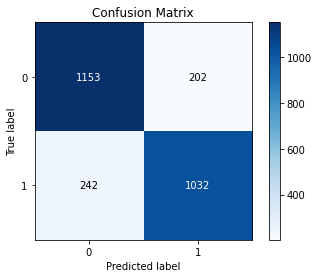

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

lr = LogisticRegression(C=10, max_iter=500, random_state=0)

# Functions used to generate confusion matrix

def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred


cmat, pred = RunModel(lr, X_train_scaled, y_train, X_test_scaled, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))
skplt.metrics.plot_confusion_matrix(y_test, pred)

### Pipelines

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(penalty='l2',random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])


## creating a pipeline including the classifiers defined above
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

best_accuracy=0.0
best_classifier=0
best_pipeline=""


# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_scaled, y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_scaled,y_test)))

Logistic Regression Test Accuracy: 0.8204640547736782
Decision Tree Test Accuracy: 0.8870292887029289
RandomForest Test Accuracy: 0.8874096614682389


Optimising randomForest's hyperparameters might be worth visiting. Unfortunately, the process crashed shortly after launching it due to a lack of resources.

### Pipeline and Gridsearch

Unfortunately I cannot implement a gridsearch to optimise randomforest's hyperparameters because my laptop does not have enough memory to process the request. Although I do not believe this would increase the accuracy significantly, it might get us above 90%. Sadly I cannot test it :(

In [29]:
from sklearn.model_selection import GridSearchCV
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with algorithms and their hyperparameters
grid_param = [{"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, verbose=0,n_jobs=-1) 

best_model = gridsearch.fit(X_train_scaled,y_train)

print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test_scaled,y_test))

/home/acardenas/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/home/acardenas/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/home/acardenas/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/home/acardenas/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on 

KeyboardInterrupt: 